### Import utilities 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
from sklearn.metrics import roc_curve, auc
from keras.models import model_from_json



# Plot data
def generate_results(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.show()
    print('AUC: %f' % roc_auc)
    
# import dataset into pandas
data_test= np.loadtxt("output1.csv")
data_test.shape

(30000, 82)

### Load model and test for ANN: execute cell only when testing ANN

Loaded model from disk
accuarcy : 80.3
30000/30000 [==============================] - 3s     


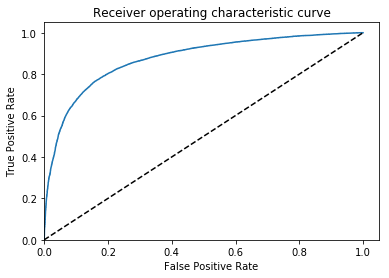

AUC: 0.874465


In [26]:
(X_test, y_test)= (data_test[:,0:81],data_test[:,81])
#X_train = X_train.reshape(X_train.shape[0], 9,9,1)
Y_test = to_categorical(y_test, 2)
    
json_file = open('ANN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("ANN_model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['binary_accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print "accuarcy :", score[1]*100

y_score = loaded_model.predict(X_test,verbose=1)
generate_results(Y_test[:, 0],y_score[:, 0])


### Load model and test for CNN: execute cell only when testing CNN

Loaded model from disk
accuarcy : 80.9033333333
29952/30000 [============================>.] - ETA: 0s

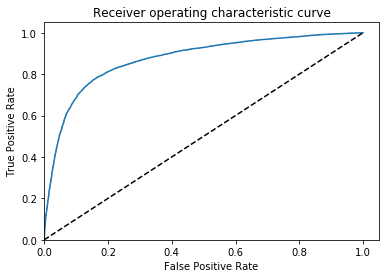

AUC: 0.872867


In [28]:
(X_test, y_test)= (data_test[:,0:81],data_test[:,81])
X_test = X_test.reshape(X_test.shape[0], 9,9,1)
Y_test = to_categorical(y_test, 2)
    
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("CNN_model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['binary_accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print "accuarcy :", score[1]*100

y_score = loaded_model.predict(X_test,verbose=1)
generate_results(Y_test[:, 0],y_score[:, 0])